<a href="https://colab.research.google.com/github/somanathrotte/Circuit_Design_AI_Project/blob/main/FIR_FILTER_TABU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


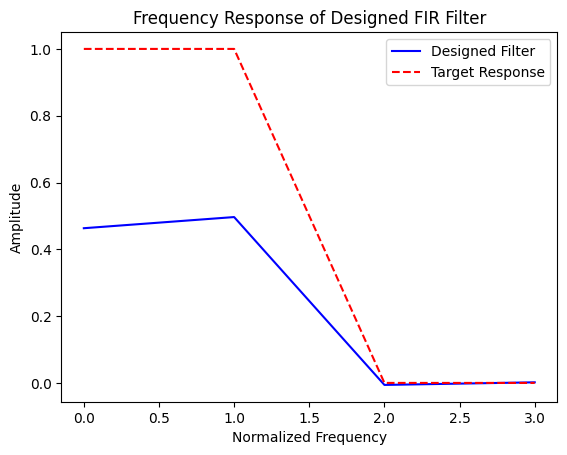

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

# Define the FIR Filter Design Problem
class FIRFilterDesignProblem:
    def __init__(self, target_response, num_taps):
        self.target_response = target_response
        self.num_taps = num_taps

    def evaluate_filter(self, coefficients):
        # Use frequency response matching as the fitness function
        _, response = freqz(coefficients, worN=len(self.target_response))
        fitness = np.sum(np.abs(response - self.target_response))
        return fitness

# Tabu Search Algorithm
class TabuSearchFIRFilterDesign:
    def __init__(self, problem, tabu_size, max_iterations):
        self.problem = problem
        self.tabu_size = tabu_size
        self.max_iterations = max_iterations

    def run(self):
        current_solution = firwin(self.problem.num_taps, 0.5)
        best_solution = current_solution.copy()
        tabu_list = []

        for iteration in range(self.max_iterations):
            neighbors = self.generate_neighbors(current_solution)
            neighbors = [neighbor for neighbor in neighbors if not any(np.all(neighbor == tabu) for tabu in tabu_list)]

            if not neighbors:
                break  # No non-tabu neighbors found

            next_solution = min(neighbors, key=self.problem.evaluate_filter)
            tabu_list.append(next_solution)
            if len(tabu_list) > self.tabu_size:
                tabu_list.pop(0)

            current_solution = next_solution

            # Update the best solution
            if self.problem.evaluate_filter(current_solution) < self.problem.evaluate_filter(best_solution):
                best_solution = current_solution

        return best_solution

    def generate_neighbors(self, solution):
        # Perturb the current solution to generate neighboring solutions
        perturbation = np.random.normal(0, 0.01, len(solution))
        neighbor1 = solution + perturbation
        neighbor2 = solution - perturbation
        return [neighbor1, neighbor2]

# Example Usage
if __name__ == "__main__":
    # Design a low-pass filter with a desired frequency response
    target_response = np.array([1.0, 1.0, 0.0, 0.0])  # Example: low-pass filter with cutoff at 0.25
    num_taps = 31  # Number of filter taps

    # Initialize the FIR Filter Design Problem
    filter_design_problem = FIRFilterDesignProblem(target_response, num_taps)

    # Initialize the Tabu Search algorithm
    tabu_search = TabuSearchFIRFilterDesign(problem=filter_design_problem, tabu_size=5, max_iterations=100)

    # Run the algorithm
    best_filter_coefficients = tabu_search.run()

    # Plot the frequency response of the designed filter
    _, response = freqz(best_filter_coefficients, worN=len(target_response))
    plt.plot(0.5 * response / np.max(np.abs(response)), 'b', label='Designed Filter')
    plt.plot(target_response, 'r', label='Target Response', linestyle='dashed')
    plt.title('Frequency Response of Designed FIR Filter')
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()


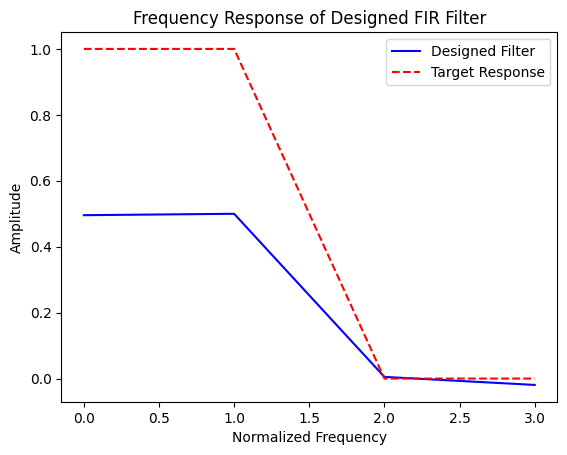

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

class FIRFilterDesignProblem:
    def __init__(self, target_response, num_taps):
        self.target_response = target_response
        self.num_taps = num_taps
        self.worN = len(target_response)  # Precompute the length for freqz

    def evaluate_filter(self, coefficients):
        _, response = freqz(coefficients, worN=self.worN)
        fitness = np.sum(np.abs(response - self.target_response))
        return fitness

class TabuSearchFIRFilterDesign:
    def __init__(self, problem, tabu_size, max_iterations):
        self.problem = problem
        self.tabu_size = tabu_size
        self.max_iterations = max_iterations

    def run(self):
        current_solution = firwin(self.problem.num_taps, 0.5)
        best_solution = current_solution.copy()
        tabu_list = []

        for iteration in range(self.max_iterations):
            neighbors = self.generate_neighbors(current_solution)
            neighbors = [neighbor for neighbor in neighbors if not any(np.all(neighbor == tabu) for tabu in tabu_list)]

            if not neighbors:
                break  # No non-tabu neighbors found

            next_solution = min(neighbors, key=self.problem.evaluate_filter)
            tabu_list.append(next_solution)
            if len(tabu_list) > self.tabu_size:
                tabu_list.pop(0)

            current_solution = next_solution

            # Update the best solution
            if self.problem.evaluate_filter(current_solution) < self.problem.evaluate_filter(best_solution):
                best_solution = current_solution

        return best_solution

    def generate_neighbors(self, solution):
        perturbation = np.random.normal(0, 0.01, len(solution))
        neighbor1 = solution + perturbation
        neighbor2 = solution - perturbation
        return [neighbor1, neighbor2]

if __name__ == "__main__":
    target_response = np.array([1.0, 1.0, 0.0, 0.0])
    num_taps = 31

    filter_design_problem = FIRFilterDesignProblem(target_response, num_taps)

    tabu_search = TabuSearchFIRFilterDesign(problem=filter_design_problem, tabu_size=5, max_iterations=100)

    best_filter_coefficients = tabu_search.run()

    _, response = freqz(best_filter_coefficients, worN=len(target_response))

    plt.plot(0.5 * response / np.max(np.abs(response)), 'b', label='Designed Filter')
    plt.plot(target_response, 'r', label='Target Response', linestyle='dashed')
    plt.title('Frequency Response of Designed FIR Filter')
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()


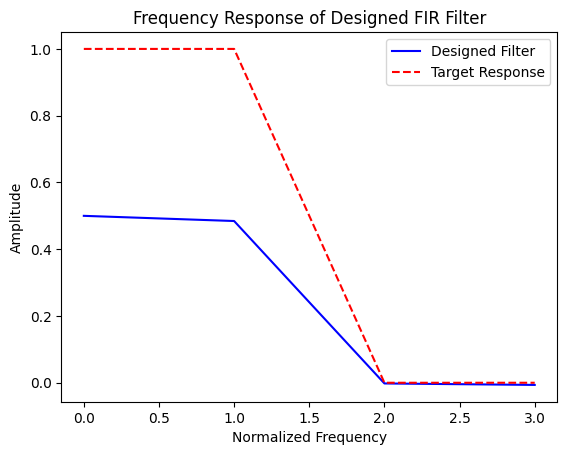

In [ ]:
import numpy as np
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt

class FIRFilterDesignProblem:
    def __init__(self, target_response, num_taps):
        self.target_response = target_response
        self.num_taps = num_taps

    def evaluate_filter(self, coefficients):
        _, response = freqz(coefficients, worN=len(self.target_response))
        fitness = np.sum(np.abs(response - self.target_response))
        return fitness

class TabuSearchFIRFilterDesign:
    def __init__(self, problem, tabu_size, max_iterations):
        self.problem = problem
        self.tabu_size = tabu_size
        self.max_iterations = max_iterations

    def run(self):
        current_solution = firwin(self.problem.num_taps, 0.5)
        best_solution = current_solution.copy()
        tabu_list = []

        for iteration in range(self.max_iterations):
            neighbors = self.generate_neighbors(current_solution, self.tabu_size)
            neighbors = [neighbor for neighbor in neighbors if not any(np.all(neighbor == tabu) for tabu in tabu_list)]

            if not neighbors:
                break  # No non-tabu neighbors found

            next_solution = min(neighbors, key=self.problem.evaluate_filter)
            tabu_list.append(next_solution)
            if len(tabu_list) > self.tabu_size:
                tabu_list.pop(0)

            current_solution = next_solution

            # Update the best solution
            if self.problem.evaluate_filter(current_solution) < self.problem.evaluate_filter(best_solution):
                best_solution = current_solution

        return best_solution

    def generate_neighbors(self, solution, num_neighbors):
        neighbors = []
        for _ in range(num_neighbors):
            perturbation = np.random.normal(0, 0.01, len(solution))
            neighbor = solution + perturbation
            neighbors.append(neighbor)
        return neighbors

if __name__ == "__main__":
    target_response = np.array([1.0, 1.0, 0.0, 0.0])
    num_taps = 31

    filter_design_problem = FIRFilterDesignProblem(target_response, num_taps)

    tabu_search = TabuSearchFIRFilterDesign(problem=filter_design_problem, tabu_size=5, max_iterations=100)

    best_filter_coefficients = tabu_search.run()

    _, response = freqz(best_filter_coefficients, worN=len(target_response))

    plt.plot(0.5 * response / np.max(np.abs(response)), 'b', label='Designed Filter')
    plt.plot(target_response, 'r', label='Target Response', linestyle='dashed')
    plt.title('Frequency Response of Designed FIR Filter')
    plt.xlabel('Normalized Frequency')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()
